# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from sklearn.cluster import KMeans

# Load and Preview Dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Split Dataset

* `Annual Income (k$)` and `Spending Score (1-100)` has been selected for clustering

In [7]:
X = dataset.iloc[:, [3, 4]].values

In [8]:
X.shape

(200, 2)

In [11]:
print( X[0:5] )

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


# Elbow method to find the optimal number of clusters

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [19]:
print( wcss )

[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923, 26686.83778518779, 24766.471609793443, 23103.122085983916]


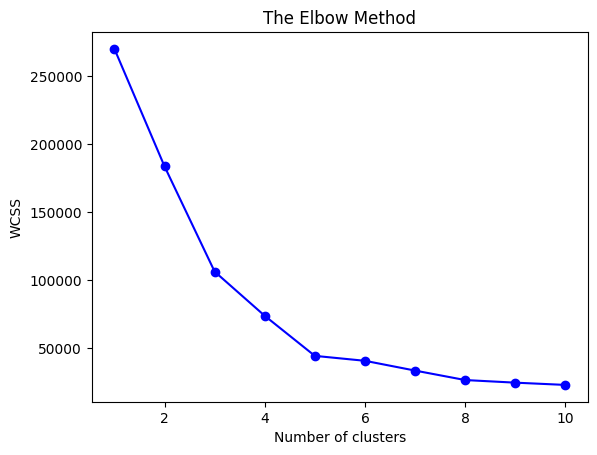

In [28]:
plt.plot(range(1, 11), wcss, 'o-b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the Training Dataset on K-Means Model

In [93]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans

KMeans(n_clusters=5, random_state=42)

In [94]:
y_kmeans = kmeans.fit_predict(X)

In [95]:
y_kmeans.shape

(200,)

In [96]:
print( y_kmeans )

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Visualising the Clusters

* `Annual Income (k$)` == X[:,0] == X first col all values/rows
* `Spending Score (1-100)` == X[:,1] = X second col all values/rows
* Total 5 clusters (0,1,2,3,4) have been predicted by K-means for `X` Dataset
* X[y_kmeans == 0, 0] == `Annual Income` values where y_kmeans == 0
* X[y_kmeans == 0, 1] == `Spending Score` values where y_kmeans == 0
* X[y_kmeans == 1, 0] == `Annual Income` values where y_kmeans == 1
* X[y_kmeans == 1, 1] == `Spending Score` values where y_kmeans == 1
* X[y_kmeans == 2, 0] == `Annual Income` values where y_kmeans == 2
* X[y_kmeans == 2, 1] == `Spending Score` values where y_kmeans == 2
* .............................................
* X[y_kmeans == 4, 0] == `Annual Income` values where y_kmeans == 4
* X[y_kmeans == 4, 1] == `Spending Score` values where y_kmeans == 4

In [108]:
X[:,0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [109]:
print( X.shape )

(200, 2)


In [110]:
print( y_kmeans.shape )

(200,)


In [111]:
print(X[0:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [112]:
print( y_kmeans )

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [113]:
print( y_kmeans == 0 )

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [114]:
print( X[y_kmeans == 0].shape )

(81, 2)


In [115]:
print( X[y_kmeans == 0][0:5])

[[39 61]
 [40 55]
 [40 47]
 [40 42]
 [40 42]]


In [116]:
print( X[y_kmeans == 0][0])

[39 61]


In [117]:
# Filter X through 'y_kmeans == 0' and then ', 0' meaning is all values of filtered X-first column

print( X[y_kmeans == 0, 0])

[39 40 40 40 40 42 42 43 43 43 43 44 44 46 46 46 46 47 47 48 48 48 48 48
 48 49 49 50 50 54 54 54 54 54 54 54 54 54 54 54 54 57 57 58 58 59 59 60
 60 60 60 60 60 61 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 65 65 65
 65 67 67 67 67 69 71 72 76]


In [118]:
print( np.min(y_kmeans))
print( np.max(y_kmeans))

0
4


In [120]:
print( X[y_kmeans == 0, 0].shape )
print( X[y_kmeans == 1, 0].shape )
print( X[y_kmeans == 2, 0].shape )
print( X[y_kmeans == 3, 0].shape )
print( X[y_kmeans == 4, 0].shape )

(81,)
(39,)
(22,)
(35,)
(23,)


In [122]:
print( X[y_kmeans == 0, 1].shape )
print( X[y_kmeans == 1, 1].shape )
print( X[y_kmeans == 2, 1].shape )
print( X[y_kmeans == 3, 1].shape )
print( X[y_kmeans == 4, 1].shape )

(81,)
(39,)
(22,)
(35,)
(23,)


In [123]:
print( kmeans.cluster_centers_ )

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [124]:
print( kmeans.cluster_centers_[:, 0] )

[55.2962963  86.53846154 25.72727273 88.2        26.30434783]


In [125]:
print( kmeans.cluster_centers_[:, 1] )

[49.51851852 82.12820513 79.36363636 17.11428571 20.91304348]


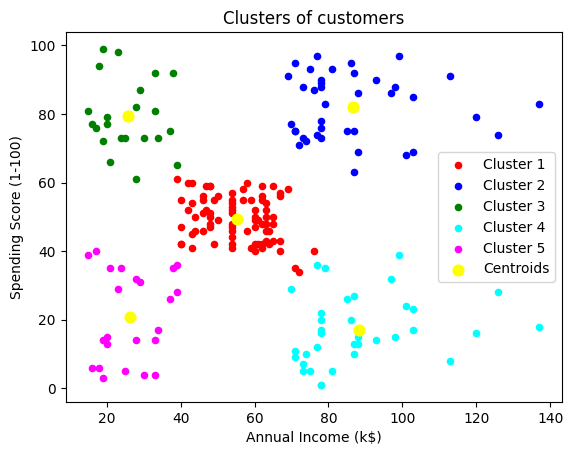

In [126]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Tag `y_kmeans` in DataFrame

In [133]:
# dataset.drop(['Predicted_Cluster'], axis=1, inplace=True)
dataset.insert(5, 'Predicted_Cluster', y_kmeans, True)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [135]:
dataset.to_csv('Mall_Customers_KMeans_Clusters.csv', index=False)

In [136]:
clusters_centres_centroid = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
clusters_centres_centroid

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
